# Titanic Disaster Survival Using Logistic Regression

In [1]:
#import libraries

In [2]:
import numpy as  np
import pandas as pd 

# Load the Data

In [3]:
#load data

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/sumitprakashdubey/Logistic-Regression/main/titanic_train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# View the data using head function which returns top rows

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.shape

(891, 12)

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Explaining Dataset

survival : Survival 0 = No, 1 = Yes



pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd



sex : Sex



Age : Age in years



sibsp : Number of siblings / spouses aboard the Titanic



parch # of parents / children aboard the Titanic




ticket : Ticket number fare Passenger fare cabin Cabin number




embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Data Analysis



Import Seaborn for visually analysing the data




Find out how many survived vs Died using countplot method of seaboarn

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
#countplot of subrvived vs not  survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

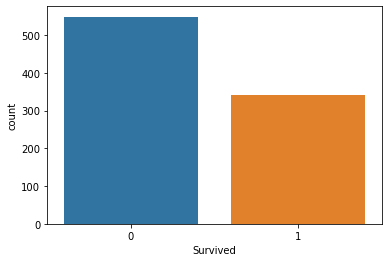

In [13]:
sns.countplot(x='Survived',data=data)

Male vs Female Survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

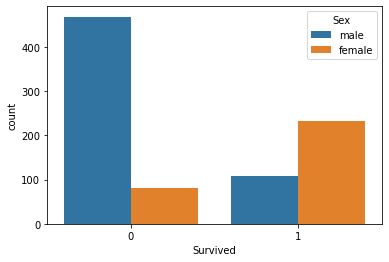

In [14]:
sns.countplot(x='Survived',data=data,hue='Sex')

# See age group of passengeres travelled




Note: We will use displot method to see the histogram. However some records does not have age hence the method will throw an error. In order to avoid that we will use dropna method to eliminate null values from graph

In [15]:
#Check for null

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#Check how many values are null

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Visualize null values

<AxesSubplot:>

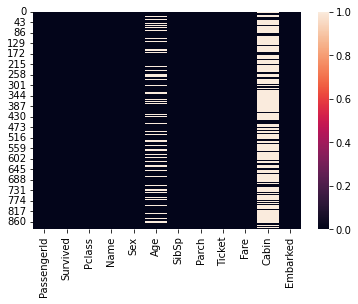

In [20]:
sns.heatmap(data.isna())

In [21]:
#find the % of null values in age column

In [22]:
#find the % of null values in cabin column

In [23]:
#find the distribution for the age column

# Data Cleaning

Fill the missing values



we will fill the missing values for age. In order to fill missing values we use fillna method.



For now we will fill the missing age by taking average of all age

In [24]:
#fill age column

In [25]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [26]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


We can verify that no more null data exist



we will examine data by isnull mehtod which will return nothing

In [27]:
#verify null value

In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Alternatively we will visualise the null value using heatmap



we will use heatmap method by passing only records which are null.

In [29]:
#visualize null values

<AxesSubplot:>

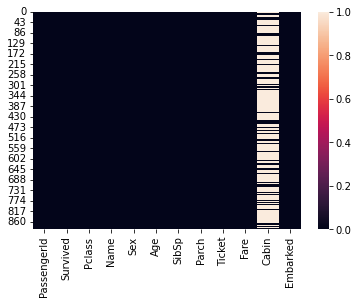

In [30]:
sns.heatmap(data.isna())

We can see cabin column has a number of null values, as such we can not use it for prediction. Hence we will drop it

In [31]:
#Drop cabin column

In [32]:
data.drop(columns=['Cabin'],inplace=True)

In [33]:

#see the contents of the data

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Preaparing Data for Model
No we will require to convert all non-numerical columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method

In [36]:
#Check for the non-numeric column

In [37]:
Gender=pd.get_dummies(data['Sex'],drop_first=True)

In [38]:
data['Gender']=Gender

In [39]:
data.drop(columns=['Sex'],inplace=True)

In [40]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,1


In [41]:

#convert sex column to numerical values

In [42]:
#drop the columns which are not required

In [43]:
#Seperate Dependent and Independent variables

In [44]:
y=data['Survived']

In [45]:
x=data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]

# Data Modelling



Building Model using Logestic Regression




Build the model

In [46]:

#import train test split method

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#train test split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

In [50]:
#import Logistic  Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
#Fit  Logistic Regression 

In [53]:
lr=LogisticRegression()

In [54]:
lr.fit(x_train,y_train)

LogisticRegression()

In [55]:
#predict

In [56]:
x_pre=lr.predict(x_test)

In [57]:
x_pre

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

# Testing



See how our model is performing

In [58]:

#print confusion matrix 

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [60]:
pd.DataFrame(confusion_matrix(y_test,x_pre),index=['Predicted Yes','Predicted No'],columns=['Actual Yes','Actual No'])

,Actual Yes,Actual No
Predicted Yes,113,19
Predicted No,30,61


In [76]:
classification_report(y_test,x_pre)

'              precision    recall  f1-score   support\n\n           0       0.79      0.86      0.82       132\n           1       0.76      0.67      0.71        91\n\n    accuracy                           0.78       223\n   macro avg       0.78      0.76      0.77       223\nweighted avg       0.78      0.78      0.78       223\n'

In [77]:
accuracy_score(y_test,x_pre)

0.7802690582959642

In [79]:
fpr,tpr,threshold=roc_curve(y_test,x_pre)

In [81]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.14393939 1.        ]
[0.         0.67032967 1.        ]
[2 1 0]


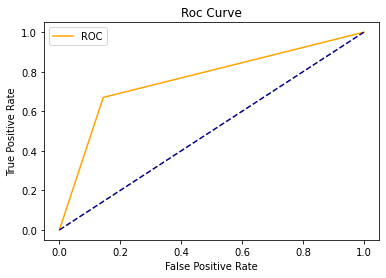

In [83]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Roc Curve")
plt.legend()
plt.show()

In [85]:
roc_auc_score(y_test,x_pre)

0.7631951381951382

In [ ]:

#Student of DataScience 
#Student of DataTrained- SAURAV
#Date - 31-08-2022
#Time- 9:44 AM